# Geometry Tutorial
https://symforce.org/tutorials/geometry_tutorial.html


This is an introductory walkthrough of the symbolic geometry package in symforce.
Symforce natively contains the following geometry objects:
complex numbers, quaternions, dual quaternions, matrices, 2D and 3D rotations, and 2D and 3D poses (translation + rotation).

In this tutorial we will demonstrate a few of the ways these geometry objects can be constructed and composed. Here we pay special attention to 3D rotations, poses, and vectors, as they are typically the most commonly used geometric objects.


In [1]:
# Setup
import symforce

symforce.set_symbolic_api("sympy")
symforce.set_log_level("warning")

from symforce.notebook_util import display
import symforce.symbolic as sf
from symforce import ops

1. Rotations
- Rotations can be defined from and converted to a number of different representations as shown below, but always use a quaternion as the underlying representation.
- We use the notation world_R_body to represent a rotation that rotates a point written in the body frame into the world frame.

- Note that in some cases a small epsilon can be provided to prevent numerical errors (e.g. division by zero) when converting to/from rotation representations.
- Furthermore, converting between certain representations can require additional symbolic expressions to guard against degenerate cases. For example, a rotation constructed from a rotation matrix results in more complexity than when constructed using an axis-angle representation as shown below.

In [2]:
# Identity definition
display(sf.Rot3())

<Rot3 <Q xyzw=[0, 0, 0, 1]>>

In [3]:
# Symbolic definition
display(sf.Rot3.symbolic("R"))

<Rot3 <Q xyzw=[R_x, R_y, R_z, R_w]>>

In [5]:
# To/From rotation matrix

# Rotate about x-axis
theta = sf.Symbol("theta")
R_mat = sf.Matrix(
    [
        [1, 0, 0],
        [0, sf.cos(theta), -sf.sin(theta)],
        [0, sf.sin(theta), sf.cos(theta)],
    ]
)
R = sf.Rot3.from_rotation_matrix(R_mat)

display(R_mat)
display(R)  # Note the additional expressions required to avoid numerical errors
display(R.to_rotation_matrix())
display(R.to_yaw_pitch_roll())

⎡1    0        0   ⎤
⎢                  ⎥
⎢0  cos(θ)  -sin(θ)⎥
⎢                  ⎥
⎣0  sin(θ)  cos(θ) ⎦

<Rot3 <Q xyzw=[(1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1)))*(sqrt(Max(0, 2 - 2*cos(theta)))/2 + Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1))/2) + 2*sin(theta)*Min(1 - Max(0, sign(-2*cos(theta) + Max(1, 2*cos(theta) + 1, cos(theta)) - 1)), 1 - Max(0, 1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1)), Min(1 - Max(0, sign(-cos(theta) + Max(1, 2*cos(theta) + 1, cos(theta)))), Max(1 - Max(0, 1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1))), 1 - Max(0, 1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1)), Min(1 - Max(0, 1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1))), 1 - Max(0, sign(-cos(theta) + Max(1, 2*cos(theta) + 1, cos(theta))))))))))/(2*sqrt(Max(0, 2*cos(theta) + 2)) - 2*Min(1 - Max(0, sign(-2*cos(theta) + Max(1, 2*cos(theta) + 1, cos(theta)) - 1)), 1 - Max(0, 1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1)), Min(1 - Max(0, sign(-cos(theta) + Max(1, 2*cos(theta) + 1, cos(theta)))), Max(1 - Max(0, 1 - Max(0, sig

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢ ⎛1   Min(1 - Max(0, 1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1
⎢ ⎜─ - ───────────────────────────────────────────────────────────────────────
⎢ ⎝2                                                                          
⎢                                                                             
⎢                                                   

⎛     ⎛                                                                       
⎜     ⎜                                                                       
⎜     ⎜⎛1   Min(1 - Max(0, 1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)
⎜atan2⎜⎜─ - ──────────────────────────────────────────────────────────────────
⎜     ⎜⎝2                                                                     
⎝     ⎝                                                                       

                                                                              
                                                                              
) - 1))), 1 - Max(0, sign(-cos(theta) + Max(1, 2*cos(theta) + 1, cos(theta))))
──────────────────────────────────────────────────────────────────────────────
      2                                                                       
                                                                              

                                                  

In [9]:
# To/From Euler angles
R = sf.Rot3.from_yaw_pitch_roll(0, 0, theta)  # Yaw rotation only
ypr = R.to_yaw_pitch_roll()

display(R)
display(R.to_rotation_matrix())
display(ops.StorageOps.simplify(list(ypr)))  # Simplify YPR expression

<Rot3 <Q xyzw=[sin(theta/2), 0, 0, cos(theta/2)]>>

⎡1         0                0        ⎤
⎢                                    ⎥
⎢             2⎛θ⎞         ⎛θ⎞    ⎛θ⎞⎥
⎢0   1 - 2⋅sin ⎜─⎟   -2⋅sin⎜─⎟⋅cos⎜─⎟⎥
⎢              ⎝2⎠         ⎝2⎠    ⎝2⎠⎥
⎢                                    ⎥
⎢        ⎛θ⎞    ⎛θ⎞            2⎛θ⎞  ⎥
⎢0  2⋅sin⎜─⎟⋅cos⎜─⎟   1 - 2⋅sin ⎜─⎟  ⎥
⎣        ⎝2⎠    ⎝2⎠             ⎝2⎠  ⎦

In [13]:
# From axis-angle representation

# Rotate about x-axis
R = sf.Rot3.from_angle_axis(angle=theta, axis=sf.Vector3(1, 1, 0))

display(R)
display(R.to_rotation_matrix())
display(R.to_yaw_pitch_roll())

<Rot3 <Q xyzw=[sin(theta/2), sin(theta/2), 0, cos(theta/2)]>>

⎡          2⎛θ⎞            2⎛θ⎞          ⎛θ⎞    ⎛θ⎞ ⎤
⎢ 1 - 2⋅sin ⎜─⎟       2⋅sin ⎜─⎟     2⋅sin⎜─⎟⋅cos⎜─⎟ ⎥
⎢           ⎝2⎠             ⎝2⎠          ⎝2⎠    ⎝2⎠ ⎥
⎢                                                   ⎥
⎢        2⎛θ⎞                2⎛θ⎞         ⎛θ⎞    ⎛θ⎞⎥
⎢   2⋅sin ⎜─⎟       1 - 2⋅sin ⎜─⎟   -2⋅sin⎜─⎟⋅cos⎜─⎟⎥
⎢         ⎝2⎠                 ⎝2⎠         ⎝2⎠    ⎝2⎠⎥
⎢                                                   ⎥
⎢      ⎛θ⎞    ⎛θ⎞       ⎛θ⎞    ⎛θ⎞            2⎛θ⎞  ⎥
⎢-2⋅sin⎜─⎟⋅cos⎜─⎟  2⋅sin⎜─⎟⋅cos⎜─⎟   1 - 4⋅sin ⎜─⎟  ⎥
⎣      ⎝2⎠    ⎝2⎠       ⎝2⎠    ⎝2⎠             ⎝2⎠  ⎦

Now that we can construct rotations, we can use them to rotate vectors as one would expect.

In [16]:
# Rotation defining orientation of body frame wrt world frame
world_R_body = sf.Rot3.symbolic("R") # rotation from body frame to world frame
display(world_R_body)# show the quaternion representation of the rotation q = Rx*i + Ry*j + Rz*k + Rw

# Point written in body frame
body_t_point = sf.Vector3.symbolic("p") 

# Point written in world frame considering only rotation
world_t_point = world_R_body * body_t_point # p_world = R * p_body

display(world_t_point)


<Rot3 <Q xyzw=[R_x, R_y, R_z, R_w]>>

⎡   ⎛       2        2    ⎞                                                   
⎢p₀⋅⎝- 2⋅R_y  - 2⋅R_z  + 1⎠ + p₁⋅(-2⋅R_w⋅R_z + 2⋅Rₓ⋅R_y) + p₂⋅(2⋅R_w⋅R_y + 2⋅R
⎢                                                                             
⎢                               ⎛      2        2    ⎞                        
⎢p₀⋅(2⋅R_w⋅R_z + 2⋅Rₓ⋅R_y) + p₁⋅⎝- 2⋅Rₓ  - 2⋅R_z  + 1⎠ + p₂⋅(-2⋅R_w⋅Rₓ + 2⋅R_y
⎢                                                                             
⎢                                                            ⎛      2        2
⎣p₀⋅(-2⋅R_w⋅R_y + 2⋅Rₓ⋅R_z) + p₁⋅(2⋅R_w⋅Rₓ + 2⋅R_y⋅R_z) + p₂⋅⎝- 2⋅Rₓ  - 2⋅R_y 

      ⎤
ₓ⋅R_z)⎥
      ⎥
      ⎥
⋅R_z) ⎥
      ⎥
    ⎞ ⎥
 + 1⎠ ⎦

In [19]:
#Chaining rotations and inverting rotations works as one would expect as well:
body_R_cam = sf.Rot3.symbolic("R_cam")
world_R_cam = world_R_body * body_R_cam # using chain rule

display(world_R_cam.to_rotation_matrix())
# Rotation inverse = negate vector part of quaternion
cam_R_body = body_R_cam.inverse()
display(body_R_cam)
display(cam_R_body)

⎡                                                                             
⎢                                                         - 2⋅(R_cam_w⋅R_y + R
⎢                                                                             
⎢                                                                             
⎢(R_cam_w⋅R_w - R_cam_x⋅Rₓ - R_cam_y⋅R_y - R_cam_z⋅R_z)⋅(2⋅R_cam_w⋅R_z - 2⋅R_c
⎢                                                                             
⎢                                                                             
⎣-(R_cam_w⋅R_w - R_cam_x⋅Rₓ - R_cam_y⋅R_y - R_cam_z⋅R_z)⋅(2⋅R_cam_w⋅R_y + 2⋅R_

                                      2                                       
_cam_x⋅R_z + R_cam_y⋅R_w - R_cam_z⋅Rₓ)  - 2⋅(R_cam_w⋅R_z - R_cam_x⋅R_y + R_cam
                                                                              
                                                                              
am_x⋅R_y + 2⋅R_cam_y⋅Rₓ + 2⋅R_cam_z⋅R_w) + (2⋅R_cam

<Rot3 <Q xyzw=[R_cam_x, R_cam_y, R_cam_z, R_cam_w]>>

<Rot3 <Q xyzw=[-R_cam_x, -R_cam_y, -R_cam_z, R_cam_w]>>

We can also easily substitute numerical values into symbolic expressions using geo objects themselves.
This makes it very convenient to substitute numeric values into large symbolic expressions constructed using many different geo objects.

In [21]:
world_R_body_numeric = sf.Rot3.from_yaw_pitch_roll(0.1, -2.3, 0.7)
display(world_t_point.subs(world_R_body, world_R_body_numeric)) # substitute rotation world_t_point with rotation world_R_body_numeric

⎡-0.662947416398295⋅p₀ - 0.554353314451006⋅p₁ - 0.503182994394693⋅p₂ ⎤
⎢                                                                    ⎥
⎢-0.0665166116342196⋅p₀ + 0.713061539471145⋅p₁ - 0.697938952419008⋅p₂⎥
⎢                                                                    ⎥
⎣ 0.74570521217672⋅p₀ - 0.429226797490819⋅p₁ - 0.509596009450867⋅p₂  ⎦

# Pose 

Poses are defined as a rotation plus a translation, and are constructed as such.
We use the notation world_T_body to represent a pose that transforms from the body frame to the world frame Pose = [Rotation, Translation]

⎡           2          2                                                      
⎢  - 2⋅T.R_y  - 2⋅T.R_z  + 1    -2⋅T.R_w⋅T.R_z + 2⋅T.Rₓ⋅T.R_y  2⋅T.R_w⋅T.R_y +
⎢                                                                             
⎢                                         2          2                        
⎢2⋅T.R_w⋅T.R_z + 2⋅T.Rₓ⋅T.R_y     - 2⋅T.Rₓ  - 2⋅T.R_z  + 1     -2⋅T.R_w⋅T.Rₓ +
⎢                                                                             
⎢                                                                        2    
⎢-2⋅T.R_w⋅T.R_y + 2⋅T.Rₓ⋅T.R_z  2⋅T.R_w⋅T.Rₓ + 2⋅T.R_y⋅T.R_z     - 2⋅T.Rₓ  - 2
⎢                                                                             
⎣              0                              0                              0

                    ⎤
 2⋅T.Rₓ⋅T.R_z   T.t0⎥
                    ⎥
                    ⎥
 2⋅T.R_y⋅T.R_z  T.t1⎥
                    ⎥
      2             ⎥
⋅T.R_y  + 1     T.t2⎥
                    ⎥
           

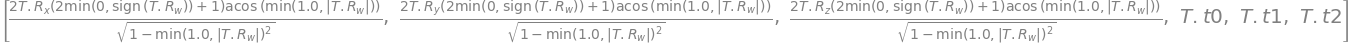

In [24]:
# Symbolic construction
world_T_body = sf.Pose3.symbolic("T")
display(world_T_body.to_homogenous_matrix())
display(world_T_body.to_tangent())

In [29]:
# Construction from a rotation and translation

# Orientation of body frame wrt world frame
world_R_body = sf.Rot3.symbolic("R")

# Position of body frame wrt world frame written in the world frame
world_t_body = sf.Vector3.symbolic("t")

world_T_body = sf.Pose3(R=world_R_body, t=world_t_body)
display(world_T_body)
display(world_T_body.to_homogenous_matrix())

display(world_T_body.R.to_rotation_matrix()) #quaternion to rotation matrix


<Pose3 R=<Rot3 <Q xyzw=[R_x, R_y, R_z, R_w]>>, t=(t0, t1, t2)>

⎡       2        2                                                      ⎤
⎢- 2⋅R_y  - 2⋅R_z  + 1  -2⋅R_w⋅R_z + 2⋅Rₓ⋅R_y  2⋅R_w⋅R_y + 2⋅Rₓ⋅R_z   t₀⎥
⎢                                                                       ⎥
⎢                             2        2                                ⎥
⎢2⋅R_w⋅R_z + 2⋅Rₓ⋅R_y   - 2⋅Rₓ  - 2⋅R_z  + 1   -2⋅R_w⋅Rₓ + 2⋅R_y⋅R_z  t₁⎥
⎢                                                                       ⎥
⎢                                                    2        2         ⎥
⎢-2⋅R_w⋅R_y + 2⋅Rₓ⋅R_z  2⋅R_w⋅Rₓ + 2⋅R_y⋅R_z   - 2⋅Rₓ  - 2⋅R_y  + 1   t₂⎥
⎢                                                                       ⎥
⎣          0                      0                      0            1 ⎦

⎡       2        2                                                  ⎤
⎢- 2⋅R_y  - 2⋅R_z  + 1  -2⋅R_w⋅R_z + 2⋅Rₓ⋅R_y  2⋅R_w⋅R_y + 2⋅Rₓ⋅R_z ⎥
⎢                                                                   ⎥
⎢                             2        2                            ⎥
⎢2⋅R_w⋅R_z + 2⋅Rₓ⋅R_y   - 2⋅Rₓ  - 2⋅R_z  + 1   -2⋅R_w⋅Rₓ + 2⋅R_y⋅R_z⎥
⎢                                                                   ⎥
⎢                                                    2        2     ⎥
⎣-2⋅R_w⋅R_y + 2⋅Rₓ⋅R_z  2⋅R_w⋅Rₓ + 2⋅R_y⋅R_z   - 2⋅Rₓ  - 2⋅R_y  + 1 ⎦

Similar to rotations, we can compose poses with poses, compose poses with 3D points, and invert poses as one would expect.

In [32]:
# Compose pose with a pose
body_T_cam = sf.Pose3.symbolic("T_cam")
world_T_cam = world_T_body * body_T_cam # a 4x4 matrix

# Compose pose with a point
body_t_point = sf.Vector3.symbolic("p")  # Position in body frame, using homogeneous coordinates p = [x, y, z, 1]
# Equivalent to: world_R_body * body_t_point + world_t_body
world_t_point = world_T_body * body_t_point
display(world_t_point) # this is a 3x1 vector in the world frame, 

⎡   ⎛       2        2    ⎞                                                   
⎢p₀⋅⎝- 2⋅R_y  - 2⋅R_z  + 1⎠ + p₁⋅(-2⋅R_w⋅R_z + 2⋅Rₓ⋅R_y) + p₂⋅(2⋅R_w⋅R_y + 2⋅R
⎢                                                                             
⎢                               ⎛      2        2    ⎞                        
⎢p₀⋅(2⋅R_w⋅R_z + 2⋅Rₓ⋅R_y) + p₁⋅⎝- 2⋅Rₓ  - 2⋅R_z  + 1⎠ + p₂⋅(-2⋅R_w⋅Rₓ + 2⋅R_y
⎢                                                                             
⎢                                                            ⎛      2        2
⎣p₀⋅(-2⋅R_w⋅R_y + 2⋅Rₓ⋅R_z) + p₁⋅(2⋅R_w⋅Rₓ + 2⋅R_y⋅R_z) + p₂⋅⎝- 2⋅Rₓ  - 2⋅R_y 

           ⎤
ₓ⋅R_z) + t₀⎥
           ⎥
           ⎥
⋅R_z) + t₁ ⎥
           ⎥
    ⎞      ⎥
 + 1⎠ + t₂ ⎦

In [35]:
# Invert a pose
body_T_world = world_T_body.inverse()
display(world_T_body.to_homogenous_matrix())
display(body_T_world.to_homogenous_matrix())

display(body_T_world.R)
display(world_T_body.R) # with a minus in the vector of quaternion

display(body_T_world.t)
display(world_T_body.t)

⎡       2        2                                                      ⎤
⎢- 2⋅R_y  - 2⋅R_z  + 1  -2⋅R_w⋅R_z + 2⋅Rₓ⋅R_y  2⋅R_w⋅R_y + 2⋅Rₓ⋅R_z   t₀⎥
⎢                                                                       ⎥
⎢                             2        2                                ⎥
⎢2⋅R_w⋅R_z + 2⋅Rₓ⋅R_y   - 2⋅Rₓ  - 2⋅R_z  + 1   -2⋅R_w⋅Rₓ + 2⋅R_y⋅R_z  t₁⎥
⎢                                                                       ⎥
⎢                                                    2        2         ⎥
⎢-2⋅R_w⋅R_y + 2⋅Rₓ⋅R_z  2⋅R_w⋅Rₓ + 2⋅R_y⋅R_z   - 2⋅Rₓ  - 2⋅R_y  + 1   t₂⎥
⎢                                                                       ⎥
⎣          0                      0                      0            1 ⎦

⎡       2        2                                                         ⎛  
⎢- 2⋅R_y  - 2⋅R_z  + 1  2⋅R_w⋅R_z + 2⋅Rₓ⋅R_y   -2⋅R_w⋅R_y + 2⋅Rₓ⋅R_z  - t₀⋅⎝- 
⎢                                                                             
⎢                             2        2                                      
⎢-2⋅R_w⋅R_z + 2⋅Rₓ⋅R_y  - 2⋅Rₓ  - 2⋅R_z  + 1   2⋅R_w⋅Rₓ + 2⋅R_y⋅R_z    -t₀⋅(-2
⎢                                                                             
⎢                                                    2        2               
⎢2⋅R_w⋅R_y + 2⋅Rₓ⋅R_z   -2⋅R_w⋅Rₓ + 2⋅R_y⋅R_z  - 2⋅Rₓ  - 2⋅R_y  + 1    -t₀⋅(2⋅
⎢                                                                             
⎣          0                      0                      0                    

     2        2    ⎞                                                         ⎤
2⋅R_y  - 2⋅R_z  + 1⎠ - t₁⋅(2⋅R_w⋅R_z + 2⋅Rₓ⋅R_y) - t₂⋅(-2⋅R_w⋅R_y + 2⋅Rₓ⋅R_z)⎥
                                                   

<Rot3 <Q xyzw=[-R_x, -R_y, -R_z, R_w]>>

<Rot3 <Q xyzw=[R_x, R_y, R_z, R_w]>>

⎡     ⎛       2        2    ⎞                                                 
⎢- t₀⋅⎝- 2⋅R_y  - 2⋅R_z  + 1⎠ - t₁⋅(2⋅R_w⋅R_z + 2⋅Rₓ⋅R_y) - t₂⋅(-2⋅R_w⋅R_y + 2
⎢                                                                             
⎢                                  ⎛      2        2    ⎞                     
⎢ -t₀⋅(-2⋅R_w⋅R_z + 2⋅Rₓ⋅R_y) - t₁⋅⎝- 2⋅Rₓ  - 2⋅R_z  + 1⎠ - t₂⋅(2⋅R_w⋅Rₓ + 2⋅R
⎢                                                                             
⎢                                                              ⎛      2       
⎣ -t₀⋅(2⋅R_w⋅R_y + 2⋅Rₓ⋅R_z) - t₁⋅(-2⋅R_w⋅Rₓ + 2⋅R_y⋅R_z) - t₂⋅⎝- 2⋅Rₓ  - 2⋅R_

        ⎤
⋅Rₓ⋅R_z)⎥
        ⎥
        ⎥
_y⋅R_z) ⎥
        ⎥
 2    ⎞ ⎥
y  + 1⎠ ⎦

⎡t₀⎤
⎢  ⎥
⎢t₁⎥
⎢  ⎥
⎣t₂⎦

# Vectors and Matrices
Vectors and matrices are all represented using subclasses of sf.Matrix class, and can be constructed in several different ways as shown below.

In [39]:
# Matrix construction. The statements below all create the same 2x3 matrix object

# Construction from 2D list
m1 = sf.Matrix([[1, 2, 3], [4, 5, 6]])

# Construction using specified size + data
m2 = sf.Matrix(2, 3, [1, 2, 3, 4, 5, 6])

# sf.MatrixNM creates a matrix with shape NxM (defined by default for 6x6
# matrices and smaller)
m3 = sf.Matrix23(1, 2, 3, 4, 5, 6)
m4 = sf.Matrix23([1, 2, 3, 4, 5, 6])

# Construction using aliases
m5 = sf.M([[1, 2, 3], [4, 5, 6]])
display(m5)
m6 = sf.M(2, 3, [1, 2, 3, 4, 5, 6])
m7 = sf.M23(1, 2, 3, 4, 5, 6)
m8 = sf.M23([1, 2, 3, 4, 5, 6])

# Construction from block matrices of appropriate dimensions
m9 = sf.Matrix23.block_matrix([[sf.M13([1, 2, 3])], [sf.M13([3, 4, 5])]])
display(m9)

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

⎡1  2  3⎤
⎢       ⎥
⎣3  4  5⎦

In [43]:
# Vector constructors. The statements below all create the same 3x1 vector object

# Construction from 2D list
v1 = sf.Matrix([[1], [2], [3]])
display(v1)

# Construction from 1D list. We assume a 1D list represents a column vector.
v2v = sf.Matrix([[1, 2, 3]]) # vector 1x3
display(v2v)
display(v2v.shape)

v2 = sf.Matrix([1, 2, 3]) # vector 3x1
display(v2)
#size of v2
display(v2.shape)

# Construction using aliases (defined by default for 9x1 vectors and smaller)
v3 = sf.Matrix31(1, 2, 3)
v4 = sf.M31(1, 2, 3)
v5 = sf.Vector3(1, 2, 3)
v6 = sf.V3(1, 2, 3)

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

[1  2  3]

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

In [45]:
#We can also use a few typical matrix constructors:
z1 = sf.Matrix63.zero()
z2 = sf.Matrix.zeros(6, 3)

#matrix ones
o1 = sf.Matrix63.one()
o2 = sf.Matrix.ones(6, 3)
display(o2)

⎡1  1  1⎤
⎢       ⎥
⎢1  1  1⎥
⎢       ⎥
⎢1  1  1⎥
⎢       ⎥
⎢1  1  1⎥
⎢       ⎥
⎢1  1  1⎥
⎢       ⎥
⎣1  1  1⎦

Note that the Matrix class itself does not contain group or lie group methods, to prevent confusion between the identity matrix and inverse matrix, and the group operations under addition. The group operations are implemented separately for matrices under addition, and are accessed through ops.GroupOps and ops.LieGroupOps.

In [46]:
zero_matrix = sf.Matrix33.zero()
identity_matrix = sf.Matrix33.eye()

# We could also write:
zero_matrix = ops.GroupOps.identity(sf.Matrix33)

display(zero_matrix)
display(identity_matrix)

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [48]:
# Matrix multiplication
m23 = sf.M23.symbolic("l")
m31 = sf.V3.symbolic("r")
display(m23 * m31)

⎡l₀ ₀⋅r₀ + l₀ ₁⋅r₁ + l₀ ₂⋅r₂⎤
⎢                           ⎥
⎣l₁ ₀⋅r₀ + l₁ ₁⋅r₁ + l₁ ₂⋅r₂⎦

In [50]:
# Vector operations
norm = m31.norm()
squared_norm = m31.squared_norm()
display(squared_norm)
unit_vec = m31.normalized()
display(unit_vec)

⎡         r₀         ⎤
⎢────────────────────⎥
⎢   _________________⎥
⎢  ╱   2     2     2 ⎥
⎢╲╱  r₀  + r₁  + r₂  ⎥
⎢                    ⎥
⎢         r₁         ⎥
⎢────────────────────⎥
⎢   _________________⎥
⎢  ╱   2     2     2 ⎥
⎢╲╱  r₀  + r₁  + r₂  ⎥
⎢                    ⎥
⎢         r₂         ⎥
⎢────────────────────⎥
⎢   _________________⎥
⎢  ╱   2     2     2 ⎥
⎣╲╱  r₀  + r₁  + r₂  ⎦

In [51]:
m33 = 5 * sf.Matrix33.eye()  # Element-wise multiplication with scalar
display(m33.inv())  # Matrix inverse

⎡1/5   0    0 ⎤
⎢             ⎥
⎢ 0   1/5   0 ⎥
⎢             ⎥
⎣ 0    0   1/5⎦

One of the most powerful operations we can use matrices for is to compute jacobians with respect to other geo objects. By default we compute jacobians with respect to the tangent space of the given object.

In [52]:
R0 = sf.Rot3.symbolic("R0")
R1 = sf.Rot3.symbolic("R1")
residual = sf.M(R0.local_coordinates(R1)) # local coordinates of R1 wrt R0, tangeant space of R0 -> R1
display(residual)

⎡2⋅(2⋅Min(0, sign(R0_w*R1_w + R0_x*R1_x + R0_y*R1_y + R0_z*R1_z)) + 1)⋅(R_0_w⋅
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                               ______________
⎢                                                              ╱              
⎢                                                            ╲╱  1 - Min(1.0, 
⎢                                                                             
⎢2⋅(2⋅Min(0, sign(R0_w*R1_w + R0_x*R1_x + R0_y*R1_y + R0_z*R1_z)) + 1)⋅(R_0_w⋅
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                               ______________
⎢                                                              ╱              
⎢                                                            ╲╱  1 - Min(1.0, 
⎢                                                                             
⎢2⋅(2⋅Min(0, sign(R0_w*R1_w + R0_x*R1_x + R0_y*R1_y 

In [56]:
jacobian = residual.jacobian(R1)
# The jacobian is quite a complex symbolic expression, so we don't display it for
# convenience.
# The shape is equal to (dimension of residual) x (dimension of tangent space)
display(jacobian.shape)
display(jacobian)

⎡                                                                         ⎛  R
⎢   2⋅(2⋅Min(0, sign(R0_w*R1_w + R0_x*R1_x + R0_y*R1_y + R0_z*R1_z)) + 1)⋅⎜- ─
⎢                                                                         ⎝   
⎢ - ──────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                         ⎛  R
⎢   2⋅(2⋅Min(0, sign(R0_w*R1_w + R0_x*R1_x + R0_y*R1_y + R0_z*R1_z)) + 1)⋅⎜- ─
⎢                                                                         ⎝   
⎢ - ──────────────────────────────────────────────────────────────────────────
⎢                                                   

# General properties of geo objects
## Storage operations
All geometric types implement the “Storage” interface. This means that they can:

- Be serialized into a list of scalar expressions (.to_storage())

- Be reconstructed from a list of scalar expressions (.from_storage())

- Use common symbolic operations (symbolic construction, substitution, simplification, etc.)

In [57]:
# Serialization to scalar list
rot = sf.Rot3()
elements = rot.to_storage()
assert len(elements) == rot.storage_dim()
display(elements)

In [58]:
# Construction from scalar list
rot2 = sf.Rot3.from_storage(elements)
assert rot == rot2

In [59]:
# Symbolic operations
rot_sym = sf.Rot3.symbolic("rot_sym")
rot_num = rot_sym.subs(rot_sym, rot)

display(rot_sym)
display(rot_num)
display(rot_num.simplify())  # Simplify internal symbolic expressions
display(rot_num.evalf())  # Numerical evaluation

<Rot3 <Q xyzw=[rot_sym_x, rot_sym_y, rot_sym_z, rot_sym_w]>>

<Rot3 <Q xyzw=[0, 0, 0, 1]>>

<Rot3 <Q xyzw=[0, 0, 0, 1]>>

<Rot3 <Q xyzw=[0, 0, 0, 1.00000000000000]>>

# Group operations
## All geometric types also implement the “Group” interface, meaning that geometric objects:

- Can be composed with objects of the same type to produce an object of the same type (.compose())

- Have an identity element (.identity())

- Can be inverted (.inverse())

- Can be created to represent the relation between two other objects of the same type (.between())

In [63]:
# Construct two random rotations
R1 = sf.Rot3.random()
R2 = sf.Rot3.random()

# Composition
display(R1.compose(R2))  # For rotations this is the same as R1 * R2
display(R1.compose(R2).to_rotation_matrix())  # For rotations this is the same as R1 * R2
display(R1.compose(R2).to_tangent()) # tangent space is different for roll pitch and yaw
display(R1.compose(R2).to_yaw_pitch_roll())

<Rot3 <Q xyzw=[-0.207743649320474, 0.518243327336956, -0.164563657314144, 0.813132973460753]>>

⎡0.408685312724228   0.0523007518769248  0.911175584899315⎤
⎢                                                         ⎥
⎢-0.482947792104782  0.859522757716809   0.167278387928649⎥
⎢                                                         ⎥
⎣-0.774427366035458  -0.508414457229532  0.376532859675466⎦

In [64]:
#Identity
R_identity = sf.Rot3.identity()
display(R_identity)
display(R_identity * R1)

<Rot3 <Q xyzw=[0, 0, 0, 1]>>

<Rot3 <Q xyzw=[-0.274959591627483, 0.0573668066176690, 0.385550301073257, -0.878895464667363]>>

In [66]:
# inverse
R_inv = R1.inverse()
display(R_inv)
display(R_inv * R1)

<Rot3 <Q xyzw=[0.274959591627483, -0.0573668066176690, -0.385550301073257, -0.878895464667363]>>

<Rot3 <Q xyzw=[0, 0, 0, 1.00000000000000]>>

In [67]:
# Between
R_delta = R1.between(R2)
display(R1*R_delta)
display(R2)

<Rot3 <Q xyzw=[0.615413023912228, -0.376784569480159, -0.0382910267762893, -0.691255376448731]>>

<Rot3 <Q xyzw=[0.615413023912228, -0.376784569480159, -0.0382910267762893, -0.691255376448731]>>

# Lie Group operations

Rotations, poses, and matrices all implement the “LieGroup” interface, meaning that they each have a tangent space. There are many great references on Lie groups out there already, so instead of introducing them here, we recommend checking out Frank Dellaert’s, Ethan Eade’s, or JL Blanco’s tutorials. In SymForce, objects which are a Lie Group can:

- Be used to compute the tangent space vector about the identity element (.to_tangent()). for example: SO(3) --> so(3)

- Be constructed from a tangent space vector about the identity element (.from_tangent()). for example: so(3) --> SO(3)

- Be perturbed by a tangent space vector about the given element (.retract()). for example: SO(3)+so(3) --> SO(3)

- Be used to compute the tangent space perturbation needed to obtain another given element (.local_coordinates()). for example: SO(3) - SO(3) --> so(3)

- Be used to compute a jacobian describing the relation between the underlying data of the object (e.g. a quaternion for a rotation) and the tangent space vector about the given element (.storage_D_tangent())

In [68]:
# To/From tangent space vector about identity element
R1 = sf.Rot3.random()
tangent_vec = R1.to_tangent()
R1_recovered = sf.Rot3.from_tangent(tangent_vec)

assert len(tangent_vec) == R1.tangent_dim()
display(R1)
display(R1_recovered)

<Rot3 <Q xyzw=[0.521349831113273, 0.594214928837832, -0.120457118446764, -0.600494008762713]>>

<Rot3 <Q xyzw=[-0.521349831113273, -0.594214928837832, 0.120457118446764, 0.600494008762713]>>

In [69]:
# Tangent space perturbations

# Perturb R1 by the given vector in the tangent space around R1
R2 = R1.retract([0.1, 2.3, -0.5]) # R1 + so(3)[0.1, 2.3, -0.5]

# Compute the tangent vector pointing from R1 to R2, in the tangent space
# around R1
recovered_tangent_vec = R1.local_coordinates(R2) # R2 - R1

display(recovered_tangent_vec)

In [70]:
# Jacobian of storage w.r.t tangent space perturbation

# We chain storage_D_tangent together with jacobians of larger symbolic
# expressions taken with respect to the symbolic elements of the object (e.g. a
# quaternion for rotations) to compute the jacobian wrt the tanget space about
# the element.
# I.e. residual_D_tangent = residual_D_storage * storage_D_tangent

jacobian = R1.storage_D_tangent()
assert jacobian.shape == (R1.storage_dim(), R1.tangent_dim())

# Poses and SE(n)
Poses in robotics are often represented using the Special Euclidean group, SE(2) and SE(3) for 2D and 3D respectively. Additionally, the manifold is often defined so that the from_tangent function is the matrix exponential of a linear combination of generators.

This has the advantage of simpler theoretical treatment in some cases, but has disadvantages in terms of the number of operations required to implement commonly used functions like retract. For these reasons, instead of using the SE(n) from_tangent and to_tangent functions, ours decouple the perturbations to rotation and translation. This means our Pose2 and Pose3 objects represent neither SE(n) nor SO(n) x R^n; they compose like objects on SE(n) but have tangent space operations analogous to SO(n) x R^n.

For most users, this should all happen under the hood. The most common observable difference is that retract(g, v) != compose(g, from_tangent(v)), so simplifications done by hand that rely on this fact must be treated with care. We do also provide a Pose3_SE3 class for users who need this functionality.